# Using californial housting train dataset
# Try to export as attached images with a notenbook in whatsapp group

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

#Q1
Using correlation coefficient function that we used in Pandas assignement 😪,
to calculate corr for the follwoing columns


1.   housing_median_age and median_house_value
2.   total_rooms and total_bedrooms
3.   population and median_house_value
4.   median_income and median_house_value

🛑 **Select just 100 point from each columns**

Then, in one figure visualize the relationship between the last columns and let the correlation coefficient value for each chart in axis title

When you finished **export** the figure as fig_1.png

note to save figure before plt.show() 😸

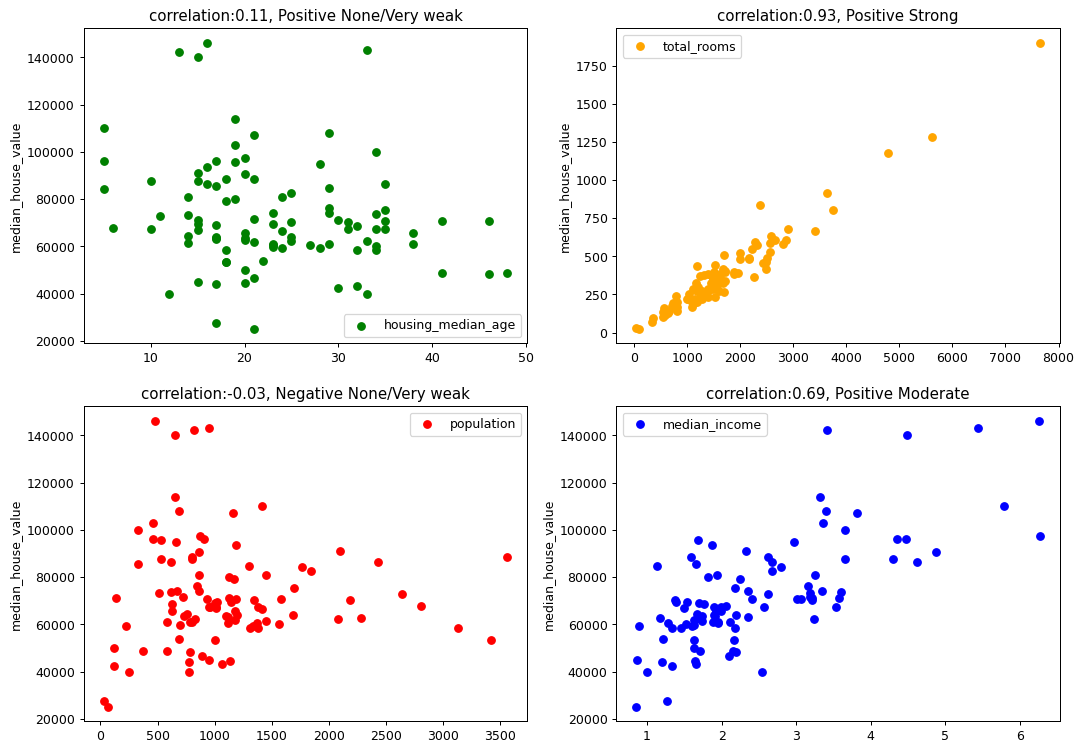

In [ ]:
fig = plt.figure(figsize = (14,10),dpi = 90)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
from scipy.stats import pearsonr
def find_corr(x,y):
  list1 = x
  list2 = y

# Apply the pearsonr()
  corr, _ = pearsonr(list1, list2)
  return corr
corr_coef = []
list_cols = ["housing_median_age","total_rooms","population","median_income"]
for i in range(4):
  if i == 1:
    corr_coef.append(find_corr(df["total_bedrooms"],df[list_cols[i]]))
    continue
  else:
    corr_coef.append(find_corr(df["median_house_value"],df[list_cols[i]]))

def print_corr(x):
  if x > 0.8:
    return ", Positive Strong"
  elif x > 0.5 and x < 0.8:
    return ", Positive Moderate"
  elif x > 0:
    return ", Positive None/Very weak"
  elif x < -0.5 and x > -0.8:
    return ", Negative Moderate"
  elif x > - 0.8:
    return ", Negative None/Very weak"
  else:
    return ", Negative Strong"
ax1.scatter(x = df["housing_median_age"][:100].values,y = df["median_house_value"][:100].values,color = "green",label = "housing_median_age")
ax1.set_title("correlation:"+str(round(corr_coef[0],2))+print_corr(round(corr_coef[0],2)))
ax1.set_ylabel("median_house_value")
ax1.legend()
ax2.scatter(x = df["total_rooms"][:100].values,y = df["total_bedrooms"][:100].values,color = "orange",label = "total_rooms")
ax2.set_title("correlation:"+str(round(corr_coef[1],2))+print_corr(round(corr_coef[1],2)))
ax2.set_ylabel("median_house_value")
ax2.legend()
ax3.scatter(x = df["population"][:100].values,y = df["median_house_value"][:100].values,color = "red",label = "population")
ax3.set_title("correlation:"+str(round(corr_coef[2],2))+print_corr(round(corr_coef[2],2)))
ax3.set_ylabel("median_house_value")
ax3.legend()
ax4.scatter(x = df["median_income"][:100].values,y = df["median_house_value"][:100].values,color = "blue",label = "median_income")
ax4.set_title("correlation:"+str(round(corr_coef[3],2))+print_corr(round(corr_coef[3],2)))
ax4.set_ylabel("median_house_value")
ax4.legend()
plt.show()




#Q2

Calculate the correlation coefficient between the following columns


1.    housing_median_age
2.    total_rooms
3.    total_bedrooms
4.    households
5.    median_income
6.    median_house_value


🛑 with each other and save it in 6X6 list and visualize it in heatmap

export the figure as fig_2.png

In [ ]:
corr_values=[]
for i in range(6):
	corr_values.append([])
#To create an 2d list of size rows and columns
corr_values=[[0 for j in range(6)]for i in range(6)]
lst_cols_1 = ["housing_median_age","total_rooms","total_bedrooms","households","median_income","median_house_value"]
lst_cols_2 = ["housing_median_age","total_rooms","total_bedrooms","households","median_income","median_house_value"]
x = 0
y = 0
for i in lst_cols_1:
  for j in lst_cols_2:
    corr_values[x][y] = round(find_corr(df[i],df[j]),2)
    y += 1
    if y == 6:
      y = 0
  x+=1
  if x == 6:
    break
print(corr_values)



[[1.0, -0.36, -0.32, -0.3, -0.12, 0.11], [-0.36, 1.0, 0.93, 0.92, 0.2, 0.13], [-0.32, 0.93, 1.0, 0.98, -0.01, 0.05], [-0.3, 0.92, 0.98, 1.0, 0.01, 0.06], [-0.12, 0.2, -0.01, 0.01, 1.0, 0.69], [0.11, 0.13, 0.05, 0.06, 0.69, 1.0]]


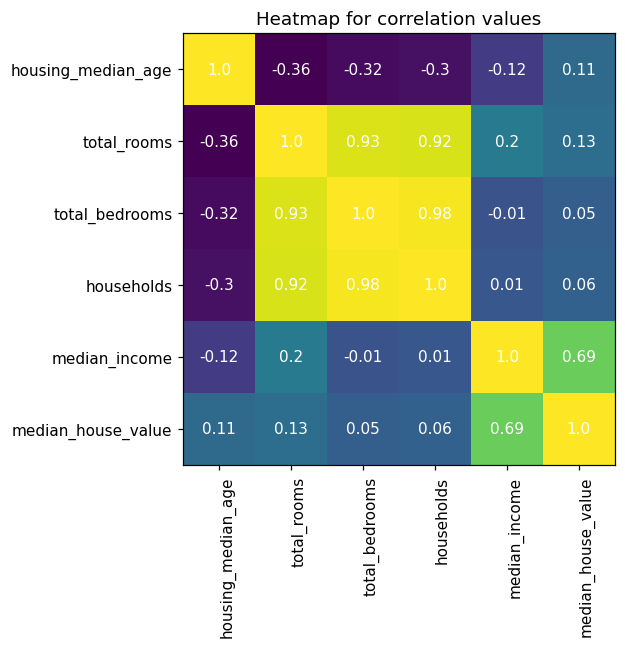

In [ ]:
corr_values = np.array(corr_values)
fig, ax = plt.subplots()

fig.set_dpi(110)
fig.set_size_inches((6,6))
im = ax.imshow(corr_values)

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(lst_cols_2)), labels=lst_cols_2)
plt.yticks(np.arange(len(lst_cols_1)), labels=lst_cols_1)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(lst_cols_2)):
    for j in range(len(lst_cols_1)):
        text = ax.text(j, i, corr_values[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Heatmap for correlation values")
fig.tight_layout()
plt.show()

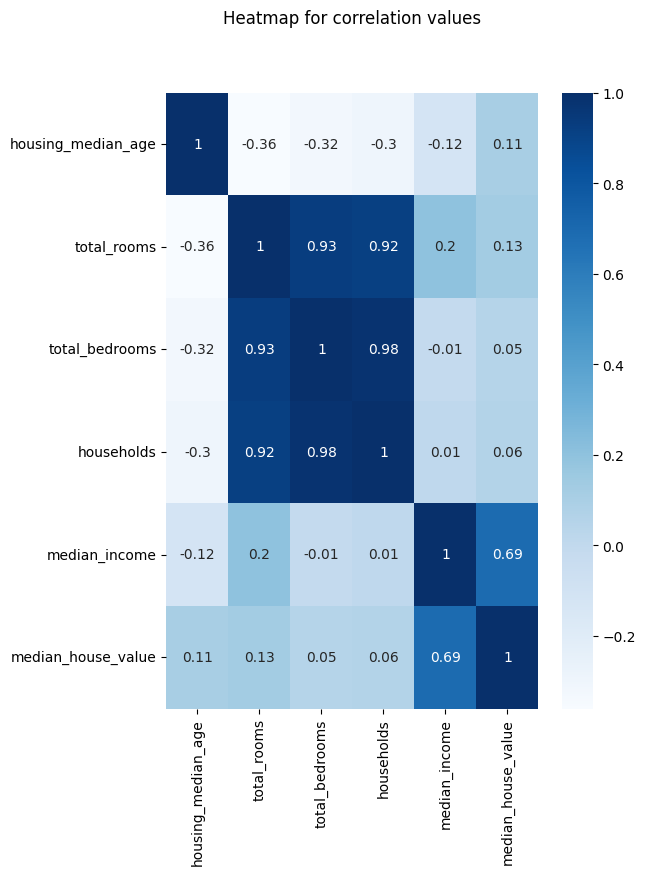

In [ ]:
fig, ax = plt.subplots(figsize=(6,8))
ax.set_title("Heatmap for correlation values",pad = 50)
sns.heatmap(data=corr_values, cmap='Blues',xticklabels=lst_cols_1, yticklabels=lst_cols_2,annot = True)
#plt.title("Heatmap for correlation values")
plt.show()